# Project 2

In [91]:
import numpy as np
from scipy.linalg import solve_banded
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt

Setting up computations:

In [92]:
#Spatial domain size
nx = 1000

#Collision time
dt = 1

#Mean free path
dx = 1
l = dx

#Diffusion coefficient
D = 0.9

#Diffusion number
r = D*dt/dx**2

#Position vector 
i = np.arange(0,1,nx)
x = np.array([ x*dx for x in i ])

Pcurr = [0] * nx
Pnext = [0] * nx

#Define vector B
B = [0]* nx
for i in range(1,nx-1):
    B[i] = r*Pcurr[i-1]+ 2*(1-r)*Pcurr[i] + r*Pcurr[i+1]

#Boundary condition for B
B[0] = B[nx-1] = 0
    
#Define matrix A
Ab = lil_matrix((3,nx))

Ab[0] = [-r for i in range(nx)]
A_0 = (np.asarray(Ab.data)[0])
A_0[0] = 0

Ab[1] = [2*(1+r) for i in range(nx)]
A_1 = (np.asarray(Ab.data)[1])

Ab[2] = [-r for i in range(nx)]
A_2 = (np.asarray(Ab.data)[2])
A_2[nx-1] = 0

A = np.array([A_0, A_1, A_2])
    
#Pnext = solve_banded((1,1), A, B)

Setting density to Dirac Delta and solving P(x,t) for various values of t.

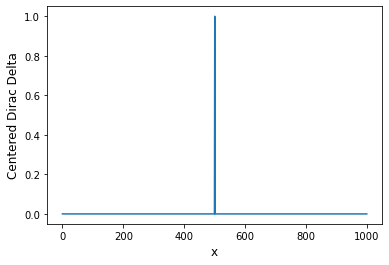

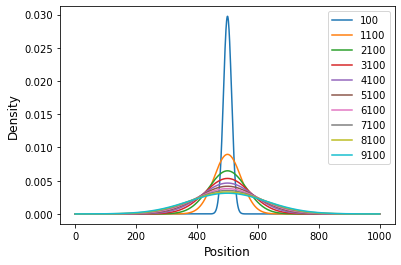

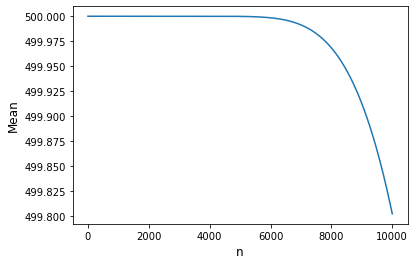

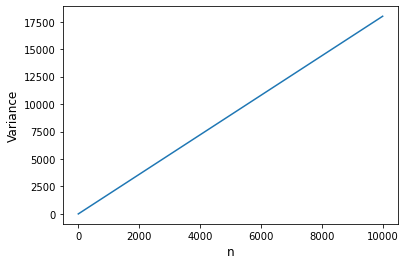

In [93]:
nt = 10000
Pcurr[int(nx/2)] = 1
plt.plot(Pcurr)
plt.xlabel("x",fontsize = 12)
plt.ylabel("Centered Dirac Delta",fontsize = 12)
plt.show()

Pt = []
Pt.append(Pcurr)

mean = []
variance = []

for i in range(0,nt):
    for j in range(1,nx-1):
        B[j] = r*Pcurr[j-1]+ 2*(1-r)*Pcurr[j] + r*Pcurr[j+1]
    Pnext = solve_banded((1,1), A, B)
    m = np.sum( [x*p for x,p in enumerate(Pnext)] )
    mean.append(m)
    v = np.sum([x**2*p for x,p in enumerate(Pnext)])
    variance.append(v - m**2)
    Pt.append(Pnext)
    Pcurr = Pnext
    
x = np.arange(100,nt,1000)
for i in x:
    plt.plot(Pt[i], label = i)
plt.legend()
plt.xlabel('Position',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.show()

plt.plot(mean)
plt.xlabel('n',fontsize = 12)
plt.ylabel('Mean',fontsize = 12)
plt.show()

plt.plot(variance)
plt.xlabel('n',fontsize = 12)
plt.ylabel('Variance',fontsize = 12)
plt.show()

Plotting the iteration of delta potential for various times, it was observed that the total density approched zero as 
time is increased. Moreover the expectation of potential seems to be centered around the mid value which makes sense
as the density spreads evenly around the centre and variance seems to linearly increase with time. 

Shifted delta potential

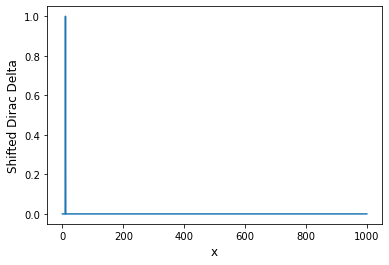

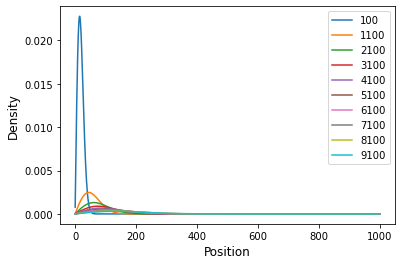

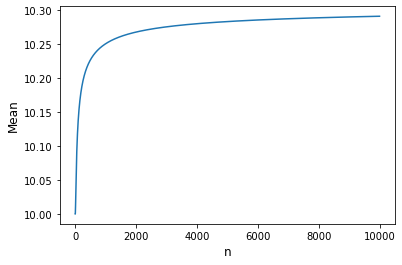

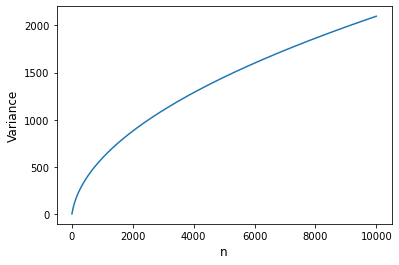

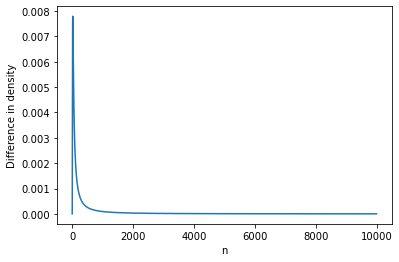

In [94]:
nt = 10000

Pcurr = [0] * nx
Pnext = [0] * nx

Pcurr[10] = 1
plt.plot(Pcurr)
plt.xlabel("x",fontsize = 12)
plt.ylabel("Shifted Dirac Delta",fontsize = 12)
plt.show()

Pt = []

mean = []
variance = []
dp = []
    
for i in range(1,nt-1):
    for j in range(1,nx-1):
        B[j] = r*Pcurr[j-1]+ 2*(1-r)*Pcurr[j] + r*Pcurr[j+1]
    Pnext = solve_banded((1,1), A, B)
    m = np.sum( [x*p for x,p in enumerate(Pnext)] )
    mean.append(m)
    v = np.sum([x**2*p for x,p in enumerate(Pnext)])
    variance.append(v - m**2)
    Pt.append(Pnext)
    dp.append((np.sum(Pcurr) - np.sum(Pnext)))
    Pcurr = Pnext
    
x = np.arange(100,nt,1000)
for i in x:
    plt.plot(Pt[i], label = i)
plt.legend()
plt.xlabel('Position',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.show()

plt.plot(mean)
plt.xlabel('n',fontsize = 12)
plt.ylabel('Mean',fontsize = 12)
plt.show()

plt.plot(variance)
plt.xlabel('n',fontsize = 12)
plt.ylabel('Variance',fontsize = 12)
plt.show()

plt.plot(dp)
plt.xlabel('n')
plt.ylabel("Difference in density")
plt.show()

Plotting the shifted Delta potential, similar results as before were obtained. The total density tend to zero in this
case too and the expectaion value seems to increase slightely from 10, which makes sense as the initial density was perfectly concentrated around 10, and the variance, like previously, seem to increase linearly with time. The difference in energy between two consequitve time was also observed to go to zero.  

4) Effects due to changes in r

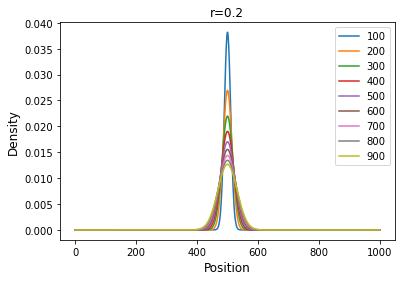

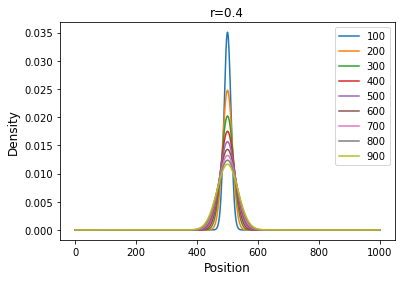

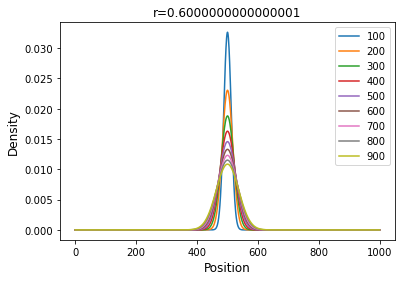

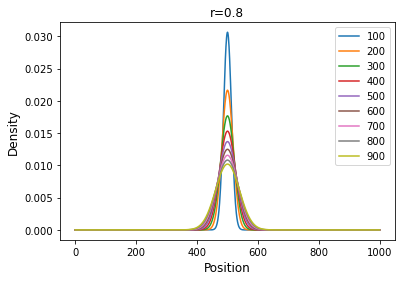

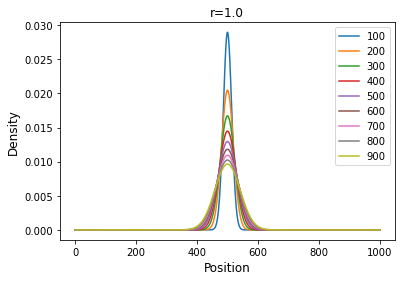

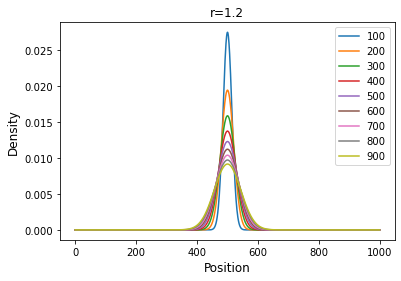

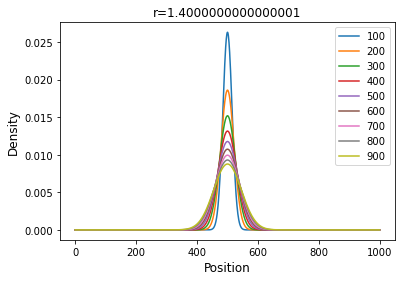

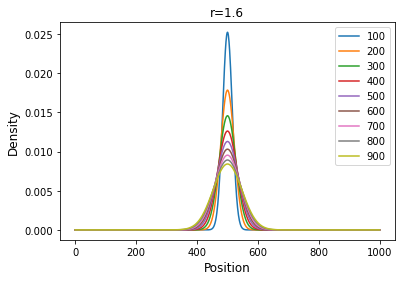

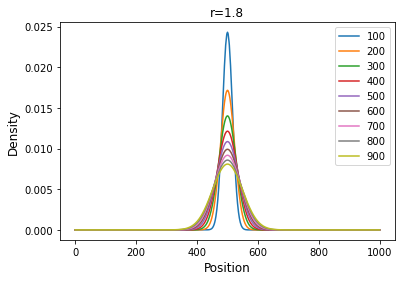

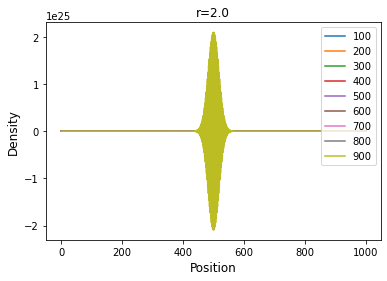

In [109]:
nt = 1000

r = np.arange(0.2,2.2,0.2) 
    
for k in r:
    Pt = []
    Pcurr = [0] * nx
    Pnext = [0] * nx
    Pcurr[int(nx/2)] = 1
    Pt.append(Pcurr)
    for i in range(0,nt):
        for j in range(1,nx-1):
            B[j] = k*Pcurr[j-1]+ 2*(1-k)*Pcurr[j] + k*Pcurr[j+1]
        Pnext = solve_banded((1,1), A, B)
        m = np.sum( [x*p for x,p in enumerate(Pcurr)] )
        mean.append(m)
        v = np.sum([x**2*p for x,p in enumerate(Pcurr)])
        variance.append(v - m**2)
        Pt.append(Pnext)
        Pcurr = Pnext
        x = np.arange(100,nt,100)
    for i in x:
        plt.plot(Pt[i], label = i)
    plt.xlabel('Position',fontsize = 12)
    plt.ylabel('Density',fontsize = 12)
    plt.title('r={:}'.format(k))
    plt.legend()
    plt.show() 

Doing the same computations for various values for r, it can be seen that only for lowere values of r, the iteration is stable. Computations becomes highly unstable for r = 2.